In [1]:
from src.densite_function import *
from src.gaussian_simulation import *
from src.IWAE_estimation import *
from src.vraisemblance import *
import numpy as np
import matplotlib.pylab as plt

# Premier estimateur

On tire $\mathbf{x}$ et $\theta$ au hasard dans $\mathbb{R}^{20}$.

In [2]:
np.random.seed(10)

x=np.random.uniform(size=20, low=-10, high=10)
theta=np.random.uniform(size=20, low=-10, high=10)

On fixe les paramètres $A$ et $b$ optimaux.

In [3]:
A=np.matrix(np.identity(20))*0.5
b=theta/2

On estime la vraisemblance au point $\mathbf{x}$ par IWAE. On généré pour cela un k-échantillon $Z_1, Z_2,...,Z_k$ de loi $q_{\phi}(z|x)$. On prend $k=100$

In [4]:
np.random.seed(589)
importance_sampling_gradientlogvraisemblance(k=100, theta=theta, A=A, b=b, x=x)

array([  4.57552551,  -2.42836196,   5.2061495 ,   1.49340535,
         1.13347676,  -4.18434696,  -8.39408227,   4.94784939,
        -9.62572691, -10.25398278,  -2.39726757,   8.63492388,
       -18.09401229,   3.85912349,  14.44323225,   6.2365202 ,
        12.15541911, -10.73610516,  17.41755606,   1.7657727 ])

In [5]:
gradient_log_vraisemblance(x, theta)

array([  9.15105101,  -4.85672393,  10.41229899,   2.9868107 ,
         2.26695352,  -8.36869391, -16.78816455,   9.89569879,
       -19.25145381, -20.50796557,  -4.79453514,  17.26984775,
       -36.18802458,   7.71824698,  28.8864645 ,  12.47304041,
        24.31083822, -21.47221033,  34.83511212,   3.5315454 ])

# Procédure de Monte Carlo

On fait 7 procédures de Monte Carlo: lors de la première, on génère 10 observations, puis 100, 10e2, ..., 10e6. On fixe M, le nombre de répétitions de Monte Carlo.

In [6]:
def procedure_MC_IWAE(M, k, x, theta, A, b):
    m=0
    estimations=np.array([])

    while m<M:
        log_vraisemblance_estim_IWAE=importance_sampling_gradientlogvraisemblance(k=k, theta=theta, A=A, b=b, x=x)
        estimations= np.append(estimations, log_vraisemblance_estim_IWAE)
        m+=1
    
    biais_B=np.mean(estimations)-log_vraisemblance(x=x, theta=theta)
    var_b=np.var(estimations)

    return biais_B, var_b

Pour vérifier que le choix de M est suffisant, on teste la procédure avec $k=100$, et on trace le graphe des moyennes ergodiques. On teste M entre 50 et 200, avec un pas de 25.

In [7]:
np.random.seed(8554)

choix_M=np.arange(50,225, 25)
biais_m={}
var_m={}

for m in choix_M:
    res=procedure_MC_IWAE(M=m, k=100, x=x, theta=theta, A=A, b=b)
    biais_m[m]=res[0]
    var_m[m]=res[1]


In [8]:
biais_m

{50: 427.92404792131214,
 75: 427.92404792131214,
 100: 427.92404792131214,
 125: 427.92404792131214,
 150: 427.92404792131214,
 175: 427.92404792131214,
 200: 427.92404792131214}

C:\Users\yanis\AppData\Local\Temp\ipykernel_58532\3596261498.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, biais, 'b', label="Biais de l'estimateur IWAE", color="blue")
C:\Users\yanis\AppData\Local\Temp\ipykernel_58532\3596261498.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[1].plot(m, var, 'b', label="Variance de l'estimateur IAWE", color="red")


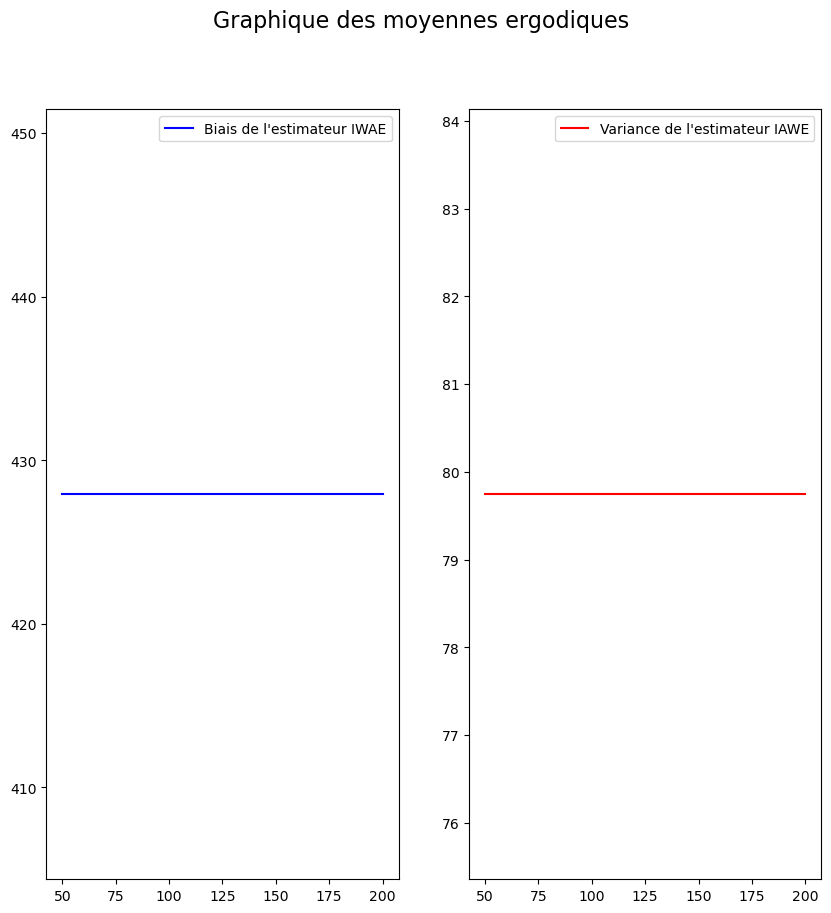

In [9]:
sorted_biais_m = sorted(biais_m.items())
sorted_var_m = sorted(var_m.items())

m, biais = zip(*sorted_biais_m)
m, var = zip(*sorted_var_m) 

fig, axs = plt.subplots(1,2, figsize=(10, 10))

axs[0].plot(m, biais, 'b', label="Biais de l'estimateur IWAE", color="blue")
axs[0].legend()

fig.suptitle('Graphique des moyennes ergodiques', fontsize=16)

axs[1].plot(m, var, 'b', label="Variance de l'estimateur IAWE", color="red")
axs[1].legend()

plt.show()

Au fil des itérations, le biais et la variance ne varient pas significativement. Passé $M \approx 160 $, la variance semble être stable. On choisit donc ce nombre de répétitions de Monte Carlo.

In [155]:
nb_observations=np.arange(100,1100, 100)
biais_result={}
var_result={}

for k in nb_observations:
   res=procedure_MC_IWAE(M=160, k=k, x=x, theta=theta, A=A, b=b)
   biais_result[k]=res[0]
   var_result[k]=res[1]

0
100


c:\Users\yanis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yanis\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


200
300
400
500
600
700
800
900
1000


C:\Users\yanis\AppData\Local\Temp\ipykernel_37172\573048430.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(k, biais_k_squared, 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
C:\Users\yanis\AppData\Local\Temp\ipykernel_37172\573048430.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[1].plot(k, var_k, 'b', label="Variance de l'estimateur IAWE", color="red")


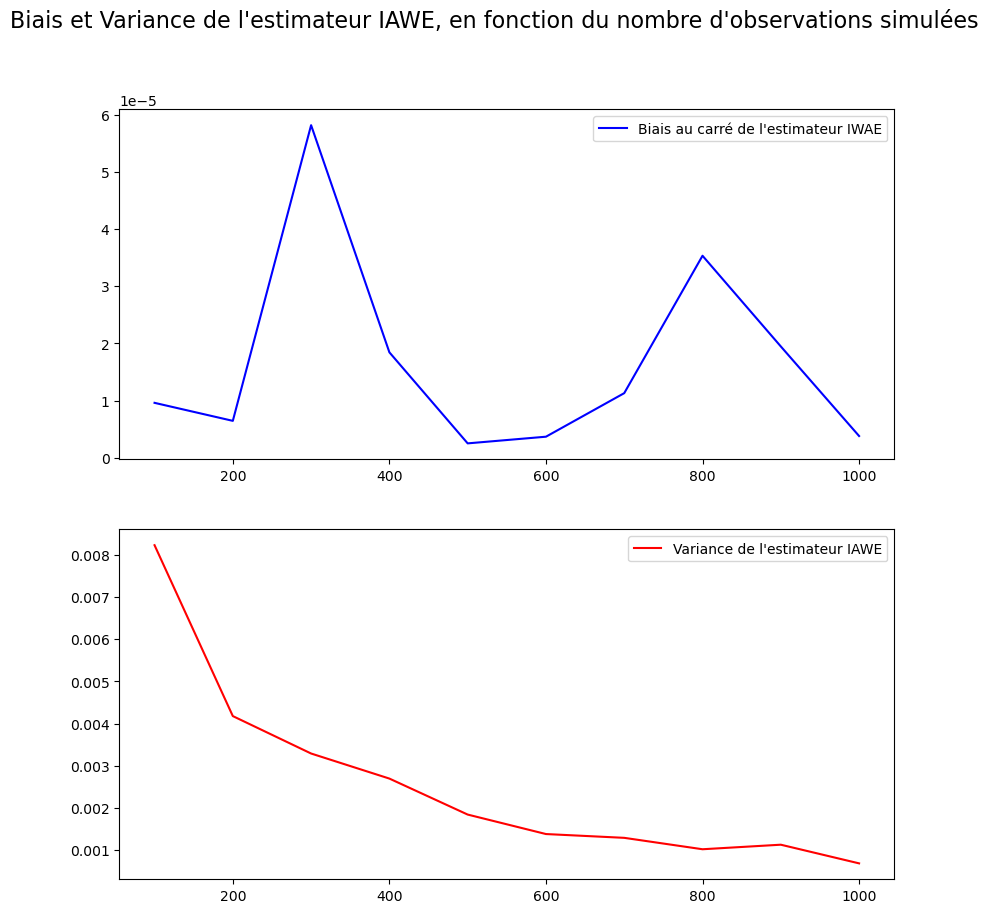

In [159]:
sorted_biais_res = sorted(biais_result.items())
sorted_var_res = sorted(var_result.items())

k, biais_k = zip(*sorted_biais_res)
k, var_k = zip(*sorted_var_res) 

k=np.array(k)
biais_k=np.array(biais_k)
var_k=np.array(var_k)

biais_k_squared=np.array([v**2 for v in biais_k])

fig, axs = plt.subplots(2,1, figsize=(10, 10))


axs[0].plot(k, biais_k_squared, 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
axs[0].legend()


fig.suptitle("Biais et Variance de l'estimateur IAWE, en fonction du nombre d'observations simulées", fontsize=16)

axs[1].plot(k, var_k, 'b', label="Variance de l'estimateur IAWE", color="red")
axs[1].legend()

plt.show()